## MEME STOCKS - Are they actually risky or are they worth investing?

#### What is a meme stock?
##### “A meme stock refers to the shares of a company that have gained a cult-like following online and through social media platforms. These online communities can go on to build hype around a stock through narratives and conversations elaborated in discussion threads on websites like Reddit and posts to followers on platforms like Twitter and Facebook.” Investopedia
GME, AMC, TSLA, BBBY, HOOD, BB, PLTR, NOK, SPCE (List of stocks)

#### Comparison securities
SPY, AGG, top 4 (MSFT, AMZN, GOOG, AAPL)


In [114]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from alpaca_trade_api import TimeFrame
import datetime
from dateutil.relativedelta import relativedelta
import hvplot.pandas
import numpy as np
import panel as pn
from panel.interact import interact
from panel import widgets
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
load_dotenv()

# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('Alpaca_API_Key')
alpaca_secret_key = os.getenv('Alpaca_Secret_Key')

if type(alpaca_api_key) ==type(''):
    if type(alpaca_secret_key) ==type(''):
        print('You have both Alpaca Keys saved in your environment variables')
    else:
        print('You have the Alpaca Key but no Secret Key saved in your environment variables')
else:
    print('You do not have any Alpaca API Keys saved in your environment variables')

You have both Alpaca Keys saved in your environment variables


In [3]:
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='V2')

In [4]:
# This is where the user inputs are collected and stored as variables

# Set the tickers for both the bond and stock portion of the portfolio
meme_tickers = ['GME','AMC','TSLA','BBBY','HOOD','BB','PLTR','NOK','SPCE']

market_tickers = ['SPY','AGG']

large_cap_tickers = ['AAPL','MSFT','GOOG','AMZN']

# Set the number of years history you'd like the API to pull for the analysis
number_of_years_history = 5

# Set the number of years to look forward in the Monte Carlo forecast
number_of_years_forecast = 5

In [5]:
# Set timeframe to 1D 
timeframe = TimeFrame.Day


number_of_trading_days = 253 * number_of_years_history
number_of_tickers = len(meme_tickers)
limit = number_of_trading_days*number_of_tickers

limit_rows = limit

# Format current date as ISO format
start_date = pd.Timestamp(datetime.date.today() - relativedelta(years=number_of_years_history), tz='America/New_York').isoformat()
end_date = pd.Timestamp(datetime.date.today(), tz='America/New_York').isoformat()

print(f"The approximate number of rows the 'alpaca_prices_df' will produce is: {limit}")

The approximate number of rows the 'alpaca_prices_df' will produce is: 11385


In [6]:
def alpaca_multi_index_df(tickers, tf, start, end, rows):
    stock_prices_multi_index_df = pd.DataFrame()
    count = 0
    for ticker in tickers:
        alpaca_prices = alpaca.get_bars(ticker, tf ,start=start, end=end, limit=rows).df
        column_names = [(ticker, x) for x in alpaca_prices.columns]
        alpaca_prices.columns = pd.MultiIndex.from_tuples(column_names)
        count = count + 1
        if count == 1:
            stock_prices_multi_index_df = alpaca_prices
        else:
            stock_prices_multi_index_df = pd.merge(stock_prices_multi_index_df, alpaca_prices, how = 'outer', left_index=True, right_index=True)
    return stock_prices_multi_index_df


In [7]:
meme_portfolio_multi_index_df = alpaca_multi_index_df(meme_tickers, timeframe, start_date, end_date, limit_rows)
meme_portfolio_multi_index_df

GME                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-04-10 04:00:00+00:00   21.60   22.1200   21.56   21.88  2345274   
2017-04-11 04:00:00+00:00   21.80   22.1500   21.68   22.11  2718362   
2017-04-12 04:00:00+00:00   22.17   22.1800   21.87   22.07  1883111   
2017-04-13 04:00:00+00:00   22.06   22.4400   21.98   22.38  3663608   
2017-04-17 04:00:00+00:00   22.45   22.9500   22.40   22.89  3554452   
...                           ...       ...     ...     ...      ...   
2022-04-04 04:00:00+00:00  167.00  173.2400  156.51  170.73  4637617   
2022-04-05 04:00:00+00:00  168.00  168.4300  152.00  153.59  3952656   
2022-04-06 04:00:00+00:00  151.01  159.2873  149.70  156.64  4065129   
2022-04-07 04:00:00+00:00  154.11  156.7000  141.57  150.00  3822919   
2022-04-08 04:00:00+00:00  149.09  150.7106  142.03  146.19  2591369   

                                                     AMC                    \
                          trade_count        vwap   open     high      low   
timestamp                                                                    
2017-04-10 04:00:00+00:00       14176   21.901005  30.55  30.7000  30.1000   
2017-04-11 04:00:00+00:00       16442   22.008212  30.60  30.8500  30.3500   
2017-04-12 04:00:00+00:00       14115   22.020441  30.55  30.8264  30.1000   
2017-04-13 04:00:00+00:00       20675   22.272443  30.35  30.6000  29.9500   
2017-04-17 04:00:00+00:00       19178   22.766778  30.45  30.7000  30.3000   
...                               ...         ...    ...      ...      ...   
2022-04-04 04:00:00+00:00      102346  166.023376  23.48  23.7500  21.9400   
2022-04-05 04:00:00+00:00      103818  158.106704  23.18  23.9600  21.0000   
2022-04-06 04:00:00+00:00       86269  154.354205  20.64  21.9188  20.0103   
2022-04-07 04:00:00+00:00       80891  147.790876  20.63  20.9400  18.6250   
2022-04-08 04:00:00+00:00       53693  147.081004  19.70  19.7000  18.1300   

                           ...       NOK                         SPCE          \
                           ...    volume trade_count      vwap   open    high   
timestamp                  ...                                                  
2017-04-10 04:00:00+00:00  ...   6250937       10213  5.320742    NaN     NaN   
2017-04-11 04:00:00+00:00  ...   8194725       10623  5.258640    NaN     NaN   
2017-04-12 04:00:00+00:00  ...  10324525       12407  5.283480    NaN     NaN   
2017-04-13 04:00:00+00:00  ...   7600357       11819  5.255388    NaN     NaN   
2017-04-17 04:00:00+00:00  ...   3136272        5609  5.261670    NaN     NaN   
...                        ...       ...         ...       ...    ...     ...   
2022-04-04 04:00:00+00:00  ...  14694709       23301  5.572727  10.14  10.685   
2022-04-05 04:00:00+00:00  ...  26475691       25302  5.534666  10.61  10.690   
2022-04-06 04:00:00+00:00  ...  24116196       27985  5.399910   9.39   9.400   
2022-04-07 04:00:00+00:00  ...  23083684       25533  5.403847   9.07   9.320   
2022-04-08 04:00:00+00:00  ...  16914144       21042  5.399308   8.91   8.990   

                                                                             
                              low  close      volume trade_count       vwap  
timestamp                                                                    
2017-04-10 04:00:00+00:00     NaN    NaN         NaN         NaN        NaN  
2017-04-11 04:00:00+00:00     NaN    NaN         NaN         NaN        NaN  
2017-04-12 04:00:00+00:00     NaN    NaN         NaN         NaN        NaN  
2017-04-13 04:00:00+00:00     NaN    NaN         NaN         NaN        NaN  
2017-04-17 04:00:00+00:00     NaN    NaN         NaN         NaN        NaN  
...                           ...    ...         ...         ...        ...  
2022-04-04 04:00:00+00:00  10.070  10.54   9700179.0     60404.0  10.451947  
2022-04-05 04

In [8]:
meme_portfolio_multi_index_df.to_csv('meme_portfolio.csv', index=False)

In [9]:
meme_portfolio_prices_df = alpaca.get_bars(meme_tickers, timeframe ,start=start_date, end=end_date, limit=limit_rows).df
meme_portfolio_prices_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-04-10 04:00:00+00:00,30.55,30.7000,30.1000,30.65,782463,5405,30.393309,AMC
2017-04-11 04:00:00+00:00,30.60,30.8500,30.3500,30.70,712543,5323,30.639968,AMC
2017-04-12 04:00:00+00:00,30.55,30.8264,30.1000,30.30,1122091,7065,30.320752,AMC
2017-04-13 04:00:00+00:00,30.35,30.6000,29.9500,30.20,1097425,7171,30.181658,AMC
2017-04-17 04:00:00+00:00,30.45,30.7000,30.3000,30.70,582622,4033,30.546910,AMC
...,...,...,...,...,...,...,...,...
2022-04-04 04:00:00+00:00,1089.50,1149.9100,1072.5300,1145.45,27379536,858769,1122.313530,TSLA
2022-04-05 04:00:00+00:00,1135.80,1152.8700,1087.3000,1091.26,26672459,858370,1114.109057,TSLA
2022-04-06 04:00:00+00:00,1073.62,1079.0000,1027.7000,1045.76,29760694,962178,1047.253174,TSLA


In [10]:
market_portfolio_multi_index_df = alpaca_multi_index_df(market_tickers, timeframe, start_date, end_date, limit_rows)
market_portfolio_multi_index_df

SPY                                      \
                             open     high     low   close     volume   
timestamp                                                               
2017-04-10 04:00:00+00:00  235.36  236.255  234.73  235.34   67615302   
2017-04-11 04:00:00+00:00  234.90  235.180  233.34  235.06   88045276   
2017-04-12 04:00:00+00:00  234.80  234.960  233.77  234.03   81864436   
2017-04-13 04:00:00+00:00  233.65  234.490  232.51  232.51   92880394   
2017-04-17 04:00:00+00:00  233.12  234.570  232.88  234.57   68405367   
...                           ...      ...     ...     ...        ...   
2022-04-04 04:00:00+00:00  453.20  456.910  452.26  456.80   59663209   
2022-04-05 04:00:00+00:00  455.23  457.830  449.82  451.03   74022189   
2022-04-06 04:00:00+00:00  446.87  448.930  443.47  446.52  105592595   
2022-04-07 04:00:00+00:00  445.67  450.690  443.53  448.77   77538519   
2022-04-08 04:00:00+00:00  448.04  450.630  445.94  447.57   79148376   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2017-04-10 04:00:00+00:00      211985  235.487358  108.53  108.650  108.4901   
2017-04-11 04:00:00+00:00      306525  234.499802  108.79  108.980  108.7500   
2017-04-12 04:00:00+00:00      262862  234.298297  108.93  109.200  108.8900   
2017-04-13 04:00:00+00:00      303955  233.364725  109.25  109.390  109.1300   
2017-04-17 04:00:00+00:00      213643  233.870859  109.30  109.400  109.1800   
...                               ...         ...     ...      ...       ...   
2022-04-04 04:00:00+00:00      503316  455.309774  106.87  106.870  106.5600   
2022-04-05 04:00:00+00:00      644313  453.412462  106.60  106.625  105.7400   
2022-04-06 04:00:00+00:00      901634  446.345270  105.20  105.805  105.1150   
2022-04-07 04:00:00+00:00      628673  447.098209  105.38  105.510  105.1300   
2022-04-08 04:00:00+00:00      573491  448.250805  104.82  105.010  104.6150   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-04-10 04:00:00+00:00  108.58   1903768       12236  108.566615  
2017-04-11 04:00:00+00:00  108.89   2200830       11420  108.874603  
2017-04-12 04:00:00+00:00  109.13   2432965       10372  109.013960  
2017-04-13 04:00:00+00:00  109.27   2339939       13465  109.262713  
2017-04-17 04:00:00+00:00  109.21   1646056        7973  109.294030  
...                           ...       ...         ...         ...  
2022-04-04 04:00:00+00:00  106.84   9956493       32544  106.739298  
2022-04-05 04:00:00+00:00  105.76  11018430       34684  105.931526  
2022-04-06 04:00:00+00:00  105.49  13322630       47090  105.463015  
2022-04-07 04:00:00+00:00  105.26   7921117       25631  105.278761  
2022-04-08 04:00:00+00:00  104.73   6501822       24900  104.804999  

[1260 rows x 14 columns]

In [11]:
market_portfolio_prices_df = alpaca.get_bars(market_tickers, timeframe ,start=start_date, end=end_date, limit=limit_rows).df
market_portfolio_prices_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-04-10 04:00:00+00:00,108.53,108.65,108.4901,108.58,1903768,12236,108.566615,AGG
2017-04-11 04:00:00+00:00,108.79,108.98,108.7500,108.89,2200830,11420,108.874603,AGG
2017-04-12 04:00:00+00:00,108.93,109.20,108.8900,109.13,2432965,10372,109.013960,AGG
2017-04-13 04:00:00+00:00,109.25,109.39,109.1300,109.27,2339939,13465,109.262713,AGG
2017-04-17 04:00:00+00:00,109.30,109.40,109.1800,109.21,1646056,7973,109.294030,AGG
...,...,...,...,...,...,...,...,...
2022-04-04 04:00:00+00:00,453.20,456.91,452.2600,456.80,59663209,503316,455.309774,SPY
2022-04-05 04:00:00+00:00,455.23,457.83,449.8200,451.03,74022189,644313,453.412462,SPY
2022-04-06 04:00:00+00:00,446.87,448.93,443.4700,446.52,105592595,901634,446.345270,SPY


In [12]:
large_cap_portfolio_multi_index_df = alpaca_multi_index_df(large_cap_tickers, timeframe, start_date, end_date, limit_rows)
large_cap_portfolio_multi_index_df

AAPL                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-04-10 04:00:00+00:00  143.50  143.8792  142.900  143.17  18934702   
2017-04-11 04:00:00+00:00  142.90  143.3500  140.060  141.63  30881588   
2017-04-12 04:00:00+00:00  141.60  142.1500  141.010  141.80  20350295   
2017-04-13 04:00:00+00:00  141.94  142.3800  141.050  141.05  17822900   
2017-04-17 04:00:00+00:00  141.17  141.8800  140.870  141.83  16582193   
...                           ...       ...      ...     ...       ...   
2022-04-04 04:00:00+00:00  174.62  178.4900  174.440  178.44  76466048   
2022-04-05 04:00:00+00:00  177.55  178.3000  174.415  175.06  73280511   
2022-04-06 04:00:00+00:00  172.14  173.6300  170.130  171.59  81636128   
2022-04-07 04:00:00+00:00  171.08  173.3600  169.850  172.14  77329736   
2022-04-08 04:00:00+00:00  171.75  171.7800  169.200  170.09  76486858   

                                                     MSFT                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2017-04-10 04:00:00+00:00      112269  143.356350   65.79   65.820   65.36   
2017-04-11 04:00:00+00:00      194111  141.460993   65.45   65.610   64.85   
2017-04-12 04:00:00+00:00      131856  141.558803   65.42   65.510   65.11   
2017-04-13 04:00:00+00:00      117140  141.790789   65.31   65.860   64.95   
2017-04-17 04:00:00+00:00      102343  141.440920   65.04   65.490   65.01   
...                               ...         ...     ...      ...     ...   
2022-04-04 04:00:00+00:00      629384  177.485223  310.25  315.110  309.71   
2022-04-05 04:00:00+00:00      619195  175.978639  313.20  314.865  309.87   
2022-04-06 04:00:00+00:00      767583  171.784223  305.00  307.000  296.71   
2022-04-07 04:00:00+00:00      624731  171.803272  296.40  303.650  296.35   
2022-04-08 04:00:00+00:00      613775  170.517566  300.44  301.120  296.28   

                           ...     GOOG                              AMZN  \
                           ...   volume trade_count         vwap     open   
timestamp                  ...                                              
2017-04-10 04:00:00+00:00  ...   982180       14777   826.330849   899.63   
2017-04-11 04:00:00+00:00  ...  1079732       19110   821.387738   907.04   
2017-04-12 04:00:00+00:00  ...   900555       15104   823.851649   903.09   
2017-04-13 04:00:00+00:00  ...  1122362       17180   824.769508   892.99   
2017-04-17 04:00:00+00:00  ...   895015       14964   833.732339   887.50   
...                        ...      ...         ...          ...      ...   
2022-04-04 04:00:00+00:00  ...   951540       63743  2866.459638  3281.36   
2022-04-05 04:00:00+00:00  ...   961914       64157  2834.469761  3354.83   
2022-04-06 04:00:00+00:00  ...  1175318       95264  2753.270018  3235.46   
2022-04-07 04:00:00+00:00  ...   965776       69287  2728.508587  3167.17   
2022-04-08 04:00:00+00:00  ...   818751       63370  2693.819115  3135.00   

                                                                             \
                              high        low    close   volume trade_count   
timestamp                                                                     
2017-04-10 04:00:00+00:00   908.51   899.0000   907.04  3185728       46059   
2017-04-11 04:00:00+00:00   911.24   897.5000   902.36  3012770       44779   
2017-04-12 04:00:00+00:00   904.09   895.2501   896.23  2456150       34460   
2017-04-13 04:00:00+00:00   894.97   884.4900   884.67  3174583       50129   
2017-04-17 04:00:00+00:00   902.38   887.5000   901.99  2854773       40631   
...                            ...        ...      ...      ...         ...   
2022-04-04 04:00:00+00:00  3367.89  3264.1100  3366.93  2494632      181694   
2022-04-05 04:00:00+00:00  336

In [13]:
large_cap_portfolio_prices_df = alpaca.get_bars(large_cap_tickers, timeframe ,start=start_date, end=end_date, limit=limit_rows).df
large_cap_portfolio_prices_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-04-10 04:00:00+00:00,143.50,143.8792,142.90,143.17,18934702,112269,143.356350,AAPL
2017-04-11 04:00:00+00:00,142.90,143.3500,140.06,141.63,30881588,194111,141.460993,AAPL
2017-04-12 04:00:00+00:00,141.60,142.1500,141.01,141.80,20350295,131856,141.558803,AAPL
2017-04-13 04:00:00+00:00,141.94,142.3800,141.05,141.05,17822900,117140,141.790789,AAPL
2017-04-17 04:00:00+00:00,141.17,141.8800,140.87,141.83,16582193,102343,141.440920,AAPL
...,...,...,...,...,...,...,...,...
2022-04-04 04:00:00+00:00,310.25,315.1100,309.71,314.97,24291449,299128,313.755392,MSFT
2022-04-05 04:00:00+00:00,313.20,314.8650,309.87,310.88,23092345,310803,311.797651,MSFT
2022-04-06 04:00:00+00:00,305.00,307.0000,296.71,299.50,40011468,547074,300.470620,MSFT


## Quantitative Analysis

The analysis has several components: performance, risk, risk-return profile, and portfolio diversification.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market (S&P 500, AGG, TOP 4 STOCKS)

In [14]:
#SEPARATE CLOSING PRICES
meme_portfolio_multi_index_close_df = meme_portfolio_multi_index_df.iloc[:, meme_portfolio_multi_index_df.columns.get_level_values(1)=='close']
meme_portfolio_multi_index_close_df.columns = meme_portfolio_multi_index_close_df.columns.droplevel(1)
meme_portfolio_multi_index_close_df.pct_change()

,GME,AMC,TSLA,BBBY,HOOD,BB,PLTR,NOK,SPCE
timestamp,,,,,,,,,
2017-04-10 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-11 04:00:00+00:00,0.010512,0.001631,-0.011780,-0.004571,NaN,NaN,NaN,-0.007533,NaN
2017-04-12 04:00:00+00:00,-0.001809,-0.013029,-0.038450,-0.018878,NaN,NaN,NaN,0.001898,NaN
2017-04-13 04:00:00+00:00,0.014046,-0.003300,0.024121,-0.001820,NaN,NaN,NaN,-0.011364,NaN
2017-04-17 04:00:00+00:00,0.022788,0.016556,-0.008421,0.001042,NaN,NaN,NaN,0.007663,NaN
...,...,...,...,...,...,...,...,...,...
2022-04-04 04:00:00+00:00,0.034727,0.000429,0.056113,-0.000876,0.024444,0.045926,0.057845,0.007207,0.055055
2022-04-05 04:00:00+00:00,-0.100392,-0.090090,-0.047309,-0.044259,-0.057845,0.007082,-0.050581,-0.012522,-0.088235
2022-04-06 04:00:00+00:00,0.019858,-0.038661,-0.041695,-0.007336,-0.039908,-0.026723,-0.064075,-0.019928,-0.052029


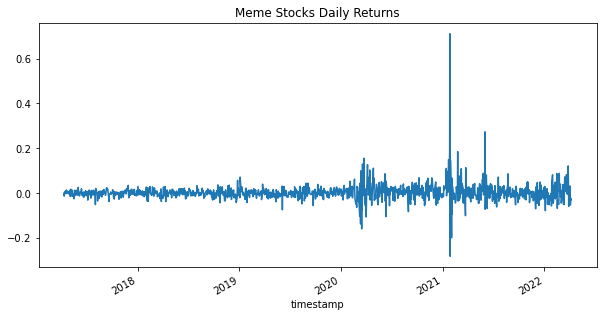

In [15]:
dailyreturns_df = meme_portfolio_multi_index_close_df.pct_change().mean(axis=1)
graph_meme = dailyreturns_df.plot(figsize=(10,5), title="Meme Stocks Daily Returns")

In [16]:
#CUMULATIVE RETURNS - DANICA
meme_cumulative_returns = (1+ dailyreturns_df).cumprod() - 1
meme_cumulative_returns.head()

timestamp
2017-04-10 04:00:00+00:00         NaN
2017-04-11 04:00:00+00:00   -0.002348
2017-04-12 04:00:00+00:00   -0.016369
2017-04-13 04:00:00+00:00   -0.012103
2017-04-17 04:00:00+00:00   -0.004274
dtype: float64

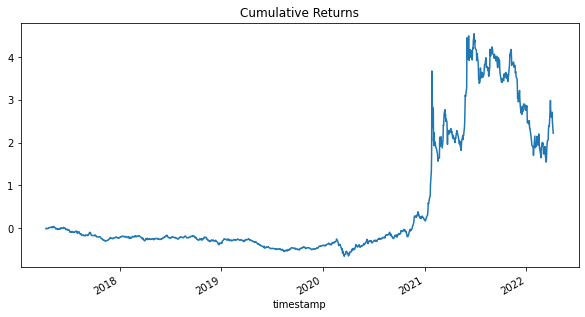

In [17]:
#Visualize the Cumulative Return
meme_cumulative_plot = meme_cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns")

### MARKET RETURNS

In [18]:
#SEPARATE CLOSING PRICES (MARKET PORTFOLIOS)
market_portfolio_multi_index_close_df = market_portfolio_multi_index_df.iloc[:, market_portfolio_multi_index_df.columns.get_level_values(1)=='close']
market_portfolio_multi_index_close_df.columns = market_portfolio_multi_index_close_df.columns.droplevel(1)
market_portfolio_multi_index_close_df.pct_change()

,SPY,AGG
timestamp,,
2017-04-10 04:00:00+00:00,NaN,NaN
2017-04-11 04:00:00+00:00,-0.001190,0.002855
2017-04-12 04:00:00+00:00,-0.004382,0.002204
2017-04-13 04:00:00+00:00,-0.006495,0.001283
2017-04-17 04:00:00+00:00,0.008860,-0.000549
...,...,...
2022-04-04 04:00:00+00:00,0.008567,0.000843
2022-04-05 04:00:00+00:00,-0.012631,-0.010109
2022-04-06 04:00:00+00:00,-0.009999,-0.002553


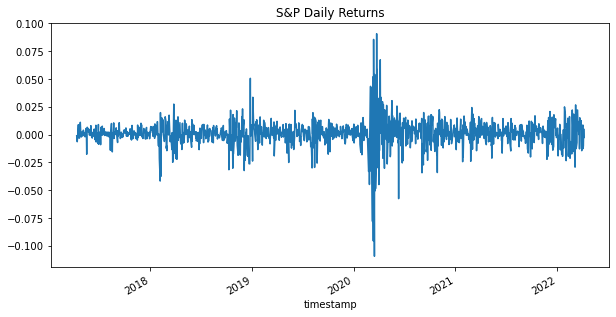

In [19]:
SP_dailyreturn = market_portfolio_multi_index_close_df['SPY'].pct_change().dropna()
graph_SP = SP_dailyreturn.plot(figsize=(10,5), title="S&P Daily Returns")

In [20]:
#CUMULATIVE RETURNS - DANICA
SP_cumulative_returns = (1+ SP_dailyreturn).cumprod() - 1
SP_cumulative_returns.head()

timestamp
2017-04-11 04:00:00+00:00   -0.001190
2017-04-12 04:00:00+00:00   -0.005566
2017-04-13 04:00:00+00:00   -0.012025
2017-04-17 04:00:00+00:00   -0.003272
2017-04-18 04:00:00+00:00   -0.006246
Name: SPY, dtype: float64

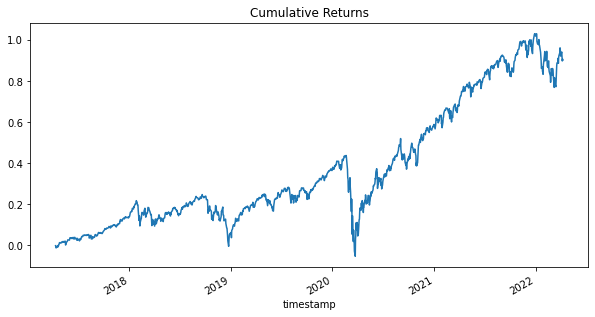

In [21]:
#Visualize the Cumulative Return
SP_cumulative_plot = SP_cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns")

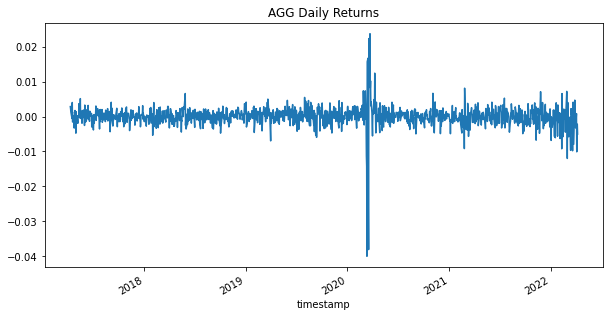

In [22]:
AGG_dailyreturn = market_portfolio_multi_index_close_df['AGG'].pct_change().dropna()
graph_AGG = AGG_dailyreturn.plot(figsize=(10,5), title="AGG Daily Returns")

In [23]:
#CUMULATIVE RETURNS - DANICA
AGG_cumulative_returns = (1+ AGG_dailyreturn).cumprod() - 1
AGG_cumulative_returns.head()

timestamp
2017-04-11 04:00:00+00:00    0.002855
2017-04-12 04:00:00+00:00    0.005065
2017-04-13 04:00:00+00:00    0.006355
2017-04-17 04:00:00+00:00    0.005802
2017-04-18 04:00:00+00:00    0.009854
Name: AGG, dtype: float64

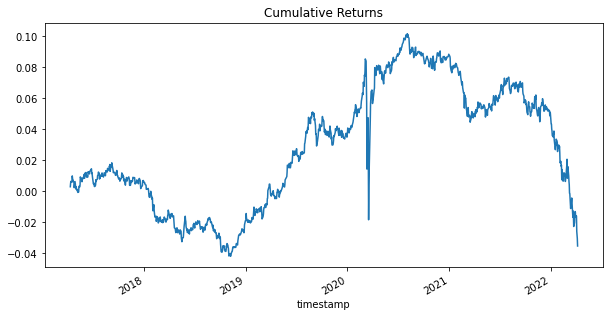

In [24]:
#Visualize the Cumulative Return
AGG_cumulative_plot = AGG_cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns")

### LARGE CAP PORTFOLIOS

In [25]:
#SEPARATE CLOSING PRICES (LARGE CAP PORTS)
large_cap_portfolio_multi_index_close_df = large_cap_portfolio_multi_index_df.iloc[:, large_cap_portfolio_multi_index_df.columns.get_level_values(1)=='close']
large_cap_portfolio_multi_index_close_df.columns = large_cap_portfolio_multi_index_close_df.columns.droplevel(1)
large_cap_portfolio_multi_index_close_df.pct_change()

,AAPL,MSFT,GOOG,AMZN
timestamp,,,,
2017-04-10 04:00:00+00:00,NaN,NaN,NaN,NaN
2017-04-11 04:00:00+00:00,-0.010756,-0.000763,-0.001673,-0.005160
2017-04-12 04:00:00+00:00,0.001200,-0.003818,0.001178,-0.006793
2017-04-13 04:00:00+00:00,-0.005289,-0.004293,-0.000922,-0.012898
2017-04-17 04:00:00+00:00,0.005530,0.008160,0.016526,0.019578
...,...,...,...,...
2022-04-04 04:00:00+00:00,0.023693,0.017937,0.020913,0.029264
2022-04-05 04:00:00+00:00,-0.018942,-0.012985,-0.017958,-0.025492
2022-04-06 04:00:00+00:00,-0.019822,-0.036606,-0.027555,-0.032300


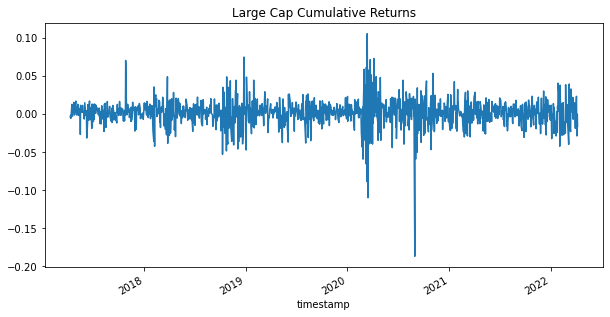

In [26]:
large_cap_dailyreturns = large_cap_portfolio_multi_index_close_df.pct_change().mean(axis=1)
graph_largecap = large_cap_dailyreturns.plot(figsize=(10,5), title="Large Cap Cumulative Returns")

In [27]:
#CUMULATIVE RETURNS - DANICA
large_cap_cumulative_returns = (1+ large_cap_dailyreturns).cumprod() - 1
large_cap_cumulative_returns.head()

timestamp
2017-04-10 04:00:00+00:00         NaN
2017-04-11 04:00:00+00:00   -0.004588
2017-04-12 04:00:00+00:00   -0.006637
2017-04-13 04:00:00+00:00   -0.012449
2017-04-17 04:00:00+00:00   -0.000155
dtype: float64

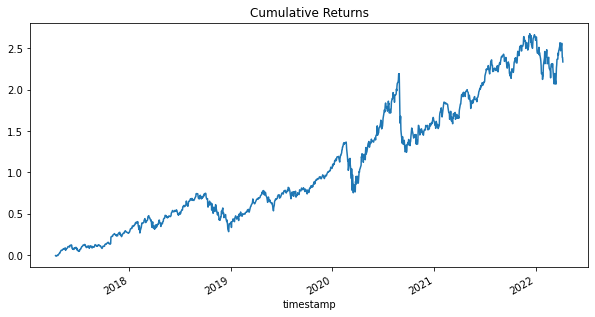

In [28]:
#Visualize the Cumulative Return
large_cap_cumulative_plot = large_cap_cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns")

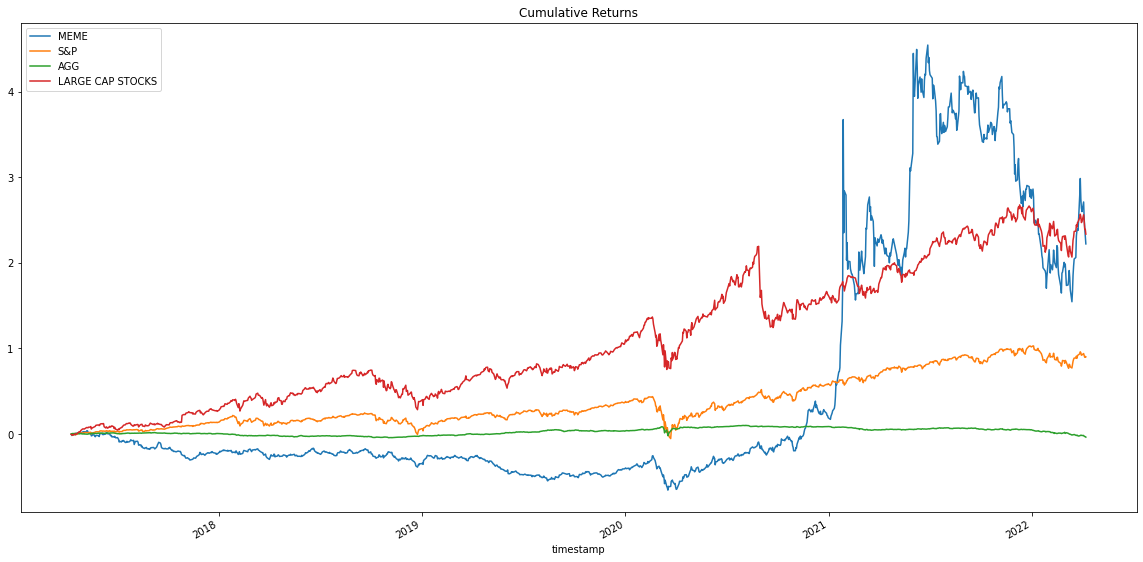

In [29]:
ax = meme_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

SP_cumulative_returns.plot(ax=ax)
AGG_cumulative_returns.plot(ax=ax)
large_cap_cumulative_returns.plot(ax=ax)

ax.legend(['MEME', 'S&P', 'AGG', 'LARGE CAP STOCKS'])

In [30]:
#Daily Returns side by side
pn.Row(graph_meme, graph_SP)

Row
    [0] Str(AxesSubplot)
    [1] Str(AxesSubplot)

In [31]:
#Interactive chart for daily returns
pn.Tabs(
    ('Meme Stocks', graph_meme),
    ('S&P 500', graph_SP),
    ('AGG', graph_AGG),
    ('Large Cap Stocks', graph_largecap)
)

Tabs
    [0] Str(AxesSubplot, name='Meme Stocks')
    [1] Str(AxesSubplot, name='S&P 500')
    [2] Str(AxesSubplot, name='AGG')
    [3] Str(AxesSubplot, name='Large Cap Stocks')

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

In [39]:
#BETA/VARIANCE - SUNG
meme_covariance = dailyreturns_df.cov(SP_dailyreturn)
LC_covariance = large_cap_dailyreturns.cov(SP_dailyreturn)
display(meme_covariance)
display(LC_covariance)

0.00017672627205013596

0.00017197544878878496

In [55]:
meme_covariance_2018 = dailyreturns_df.loc['2018-01-01' : '2019-01-01'].cov(SP_dailyreturn.loc['2018-01-01' : '2019-01-01'])
LC_covariance_2018 = large_cap_dailyreturns.loc['2018-01-01' : '2019-01-01'].cov(SP_dailyreturn.loc['2018-01-01' : '2019-01-01'])
meme_covariance_2019 = dailyreturns_df.loc['2019-01-01' : '2020-01-01'].cov(SP_dailyreturn.loc['2019-01-01' : '2020-01-01'])
LC_covariance_2019 = large_cap_dailyreturns.loc['2019-01-01' : '2020-01-01'].cov(SP_dailyreturn.loc['2019-01-01' : '2020-01-01'])
meme_covariance_2020 = dailyreturns_df.loc['2020-01-01' : '2021-01-01'].cov(SP_dailyreturn.loc['2020-01-01' : '2021-01-01'])
LC_covariance_2020 = large_cap_dailyreturns.loc['2020-01-01' : '2021-01-01'].cov(SP_dailyreturn.loc['2020-01-01' : '2021-01-01'])
meme_covariance_2021 = dailyreturns_df.loc['2021-01-01' : '2022-01-01'].cov(SP_dailyreturn.loc['2021-01-01' : '2022-01-01'])
LC_covariance_2021 = large_cap_dailyreturns.loc['2021-01-01' : '2022-01-01'].cov(SP_dailyreturn.loc['2021-01-01' : '2022-01-01'])
meme_covariance_2022 = dailyreturns_df.loc['2022-01-01' :].cov(SP_dailyreturn.loc['2022-01-01' :])
LC_covariance_2022 = large_cap_dailyreturns.loc['2022-01-01' :].cov(SP_dailyreturn.loc['2022-01-01' :])

In [43]:
SP_variance = SP_dailyreturn.var()
AGG_variance = AGG_dailyreturn.var()

In [59]:
SP_variance_2018 = SP_dailyreturn.loc['2018-01-01' : '2019-01-01'].var()
AGG_variance_2018 = AGG_dailyreturn.loc['2018-01-01' : '2019-01-01'].var()
SP_variance_2019 = SP_dailyreturn.loc['2019-01-01' : '2020-01-01'].var()
AGG_variance_2019 = AGG_dailyreturn.loc['2019-01-01' : '2020-01-01'].var()
SP_variance_2020 = SP_dailyreturn.loc['2020-01-01' : '2021-01-01'].var()
AGG_variance_2020 = AGG_dailyreturn.loc['2020-01-01' : '2021-01-01'].var()
SP_variance_2021 = SP_dailyreturn.loc['2021-01-01' : '2022-01-01'].var()
AGG_variance_2021 = AGG_dailyreturn.loc['2021-01-01' : '2022-01-01'].var()
SP_variance_2022 = SP_dailyreturn.loc['2022-01-01' :].var()
AGG_variance_2022 = AGG_dailyreturn.loc['2022-01-01' :].var()

In [45]:
meme_beta_SP = meme_covariance / SP_variance
LC_beta_SP = LC_covariance / SP_variance
meme_beta_AGG = meme_covariance / AGG_variance
LC_beta_AGG = LC_covariance / AGG_variance

display(meme_beta_SP)
display(LC_beta_SP)
display(meme_beta_AGG)
display(LC_beta_AGG)

1.1738277580510168

1.142272471148421

18.604568800202962

18.10443366354182

In [ ]:
meme_beta_SP_2018 = meme_covariance_2018 / SP_variance_2018
LC_beta_SP_2018 = LC_covariance_2018 / SP_variance_2018
meme_beta_SP_2019 = meme_covariance_2019 / SP_variance_2019
LC_beta_SP_2019 = LC_covariance_2019 / SP_variance_2019
meme_beta_SP_2020 = meme_covariance_2020 / SP_variance_2020
LC_beta_SP_2020 = LC_covariance_2020 / SP_variance_2020
meme_beta_SP_2021 = meme_covariance_2021 / SP_variance_2021
LC_beta_SP_2021 = LC_covariance_2021 / SP_variance_2021
meme_beta_SP_2022 = meme_covariance_2022 / SP_variance_2022
LC_beta_SP_2022 = LC_covariance_2022 / SP_variance_2022

# display(meme_beta_SP_2018)
# display(meme_beta_SP_2019)
# display(meme_beta_SP_2020)
# display(meme_beta_SP_2021)
# display(meme_beta_SP_2022)
# display(LC_beta_SP_2018)
# display(LC_beta_SP_2019)
# display(LC_beta_SP_2020)
# display(LC_beta_SP_2021)
# display(LC_beta_SP_2022)

beta_index_name = ["2018","2019","2020","2021","2022"]
beta_column = ["Beta by Year"]
beta_list_meme = np.array([meme_beta_SP_2018,meme_beta_SP_2019,meme_beta_SP_2020,meme_beta_SP_2021,meme_beta_SP_2022])
beta_list_LC = np.array([LC_beta_SP_2018,LC_beta_SP_2019,LC_beta_SP_2020,LC_beta_SP_2021,LC_beta_SP_2022])



In [125]:
data = {'Year': beta_index_name, 'Beta_value_meme': beta_list_meme, 'Beta_value_LC': beta_list_LC}
beta_df = pd.DataFrame(data=data)
beta_df = beta_df.set_index('Year')
beta_df

,Beta_value_meme,Beta_value_LC
Year,,
2018,0.946278,1.416919
2019,1.286475,1.356711
2020,1.300042,1.000633
2021,-0.156050,1.182635
2022,2.290725,1.391981


<AxesSubplot:title={'center':'Beta Value by Year'}, xlabel='Year', ylabel='Beta_value'>

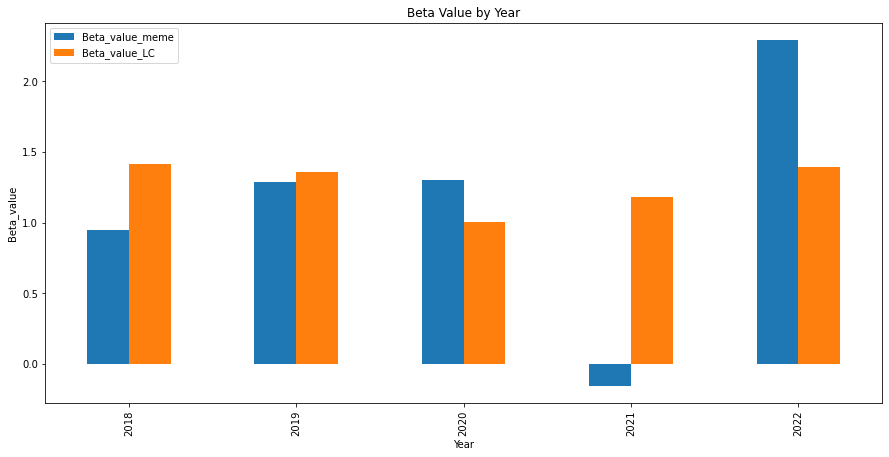

In [126]:
beta_df.plot(kind = "bar",ylabel='Beta_value', figsize=(15,7), title="Beta Value by Year")

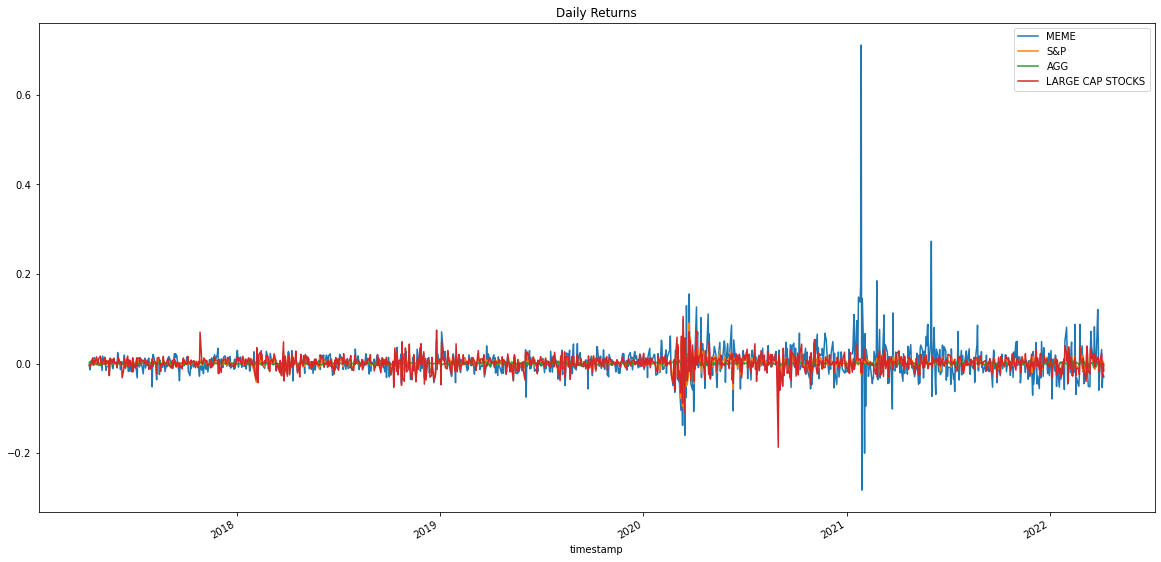

In [46]:
#DAILY RETURNS GRAPH - JUNG

ax = dailyreturns_df.plot(figsize=(20,10), title="Daily Returns")

SP_dailyreturn.plot(ax=ax)
AGG_dailyreturn.plot(ax=ax)
large_cap_dailyreturns.plot(ax=ax)

ax.legend(['MEME', 'S&P', 'AGG', 'LARGE CAP STOCKS'])



In [47]:
# DAILY RETURNS MEANS - JUNG (Do formulas for 1, 3 and 5 years & return numbers as percentages)

print('AVERAGE DAILY RETURNS')
print(f"Meme:      {round(100*dailyreturns_df.mean(),2)}%")
print(f"SP:        {round(100*SP_dailyreturn.mean(),2)}%")
print(f"Bond:      {round(100*AGG_dailyreturn.mean(),2)}%")
print(f"Large cap: {round(100*large_cap_dailyreturns.mean(),2)}%")


AVERAGE DAILY RETURNS
Meme:      0.16%
SP:        0.06%
Bond:      -0.0%
Large cap: 0.11%


In [48]:
# ANNUALIZED RETURNS - JUNG

trading_days = 252
annual_average_returns_memestock = dailyreturns_df.mean() * trading_days
annual_average_returns_SP = SP_dailyreturn.mean() * trading_days
annual_average_returns_AGG = AGG_dailyreturn.mean() * trading_days
annual_average_returns_large_cap = large_cap_dailyreturns.mean() * trading_days

print('ANNUALIZED RETURNS')
print(f"Meme:      {round(100*annual_average_returns_memestock,2)}%")
print(f"SP:        {round(100*annual_average_returns_SP,2)}%")
print(f"Bond:      {round(100*annual_average_returns_AGG,2)}%")
print(f"Large cap: {round(100*annual_average_returns_large_cap,2)}%")


ANNUALIZED RETURNS
Meme:      39.56%
SP:        14.78%
Bond:      -0.6%
Large cap: 27.93%


In [49]:
print('ANNUALIZED RETURNS - MEME')
print(f"2018: {round(100*dailyreturns_df.loc['2018-01-01' : '2019-01-01'].mean() * trading_days,2)}%")
print(f"2019: {round(100*dailyreturns_df.loc['2019-01-01' : '2020-01-01'].mean() * trading_days,2)}%")
print(f"2020: {round(100*dailyreturns_df.loc['2020-01-01' : '2021-01-01'].mean() * trading_days,2)}%")
print(f"2021: {round(100*dailyreturns_df.loc['2021-01-01' : '2022-01-01'].mean() * trading_days,2)}%")
print(f"2022: {round(100*dailyreturns_df.loc['2022-01-01' : '2022-04-08'].mean() * trading_days,2)}%")

print('ANNUALIZED RETURNS - SP')
print(f"2018: {round(100*SP_dailyreturn.loc['2018-01-01' : '2019-01-01'].mean() * trading_days,2)}%")
print(f"2019: {round(100*SP_dailyreturn.loc['2019-01-01' : '2020-01-01'].mean() * trading_days,2)}%")
print(f"2020: {round(100*SP_dailyreturn.loc['2020-01-01' : '2021-01-01'].mean() * trading_days,2)}%")
print(f"2021: {round(100*SP_dailyreturn.loc['2021-01-01' : '2022-01-01'].mean() * trading_days,2)}%")
print(f"2022: {round(100*SP_dailyreturn.loc['2022-01-01' : '2022-04-08'].mean() * trading_days,2)}%")

print('ANNUALIZED RETURNS - AGG')
print(f"2018: {round(100*AGG_dailyreturn.loc['2018-01-01' : '2019-01-01'].mean() * trading_days,2)}%")
print(f"2019: {round(100*AGG_dailyreturn.loc['2019-01-01' : '2020-01-01'].mean() * trading_days,2)}%")
print(f"2020: {round(100*AGG_dailyreturn.loc['2020-01-01' : '2021-01-01'].mean() * trading_days,2)}%")
print(f"2021: {round(100*AGG_dailyreturn.loc['2021-01-01' : '2022-01-01'].mean() * trading_days,2)}%")
print(f"2022: {round(100*AGG_dailyreturn.loc['2022-01-01' : '2022-04-08'].mean() * trading_days,2)}%")

print('ANNUALIZED RETURNS - Large Cap')
print(f"2018: {round(100*large_cap_dailyreturns.loc['2018-01-01' : '2019-01-01'].mean() * trading_days,2)}%")
print(f"2019: {round(100*large_cap_dailyreturns.loc['2019-01-01' : '2020-01-01'].mean() * trading_days,2)}%")
print(f"2020: {round(100*large_cap_dailyreturns.loc['2020-01-01' : '2021-01-01'].mean() * trading_days,2)}%")
print(f"2021: {round(100*large_cap_dailyreturns.loc['2021-01-01' : '2022-01-01'].mean() * trading_days,2)}%")
print(f"2022: {round(100*large_cap_dailyreturns.loc['2022-01-01' : '2022-04-08'].mean() * trading_days,2)}%")


ANNUALIZED RETURNS - MEME
2018: -12.83%
2019: -5.72%
2020: 88.41%
2021: 161.8%
2022: -34.22%
ANNUALIZED RETURNS - SP
2018: -5.12%
2019: 26.1%
2020: 20.58%
2021: 24.8%
2022: -19.88%
ANNUALIZED RETURNS - AGG
2018: -2.61%
2019: 5.43%
2020: 5.38%
2021: -3.48%
2022: -31.45%
ANNUALIZED RETURNS - Large Cap
2018: 13.21%
2019: 40.87%
2020: 33.67%
2021: 33.53%
2022: -23.03%


In [50]:
#Create Dataframe for Yearly Annual Return - JUNG
annualized_returns_by_year =  {'Year':['2018', '2019', '2020', '2021', '2022'],
        'Meme':[-12.83, -5.72, 88.41, 161.8, -34.22], 
        'SP':[-5.12, 26.1, 20.58, 24.8, -19.88],
        'AGG':[-2.61, 5.43, 5.38, -3.48, -31.45],
        'Large Cap':[13.21, 40.87, 33.67, 33.53, -23.03]}
 
# Create the pandas DataFrame - JUNG
annualized_returns_by_year_df = pd.DataFrame(annualized_returns_by_year)

annualized_returns_by_year_df

,Year,Meme,SP,AGG,Large Cap
0,2018,-12.83,-5.12,-2.61,13.21
1,2019,-5.72,26.10,5.43,40.87
2,2020,88.41,20.58,5.38,33.67
3,2021,161.80,24.80,-3.48,33.53
4,2022,-34.22,-19.88,-31.45,-23.03


<AxesSubplot:title={'center':'Annualized Returns by Year'}, xlabel='Year', ylabel='Annualzed Returns (%)'>

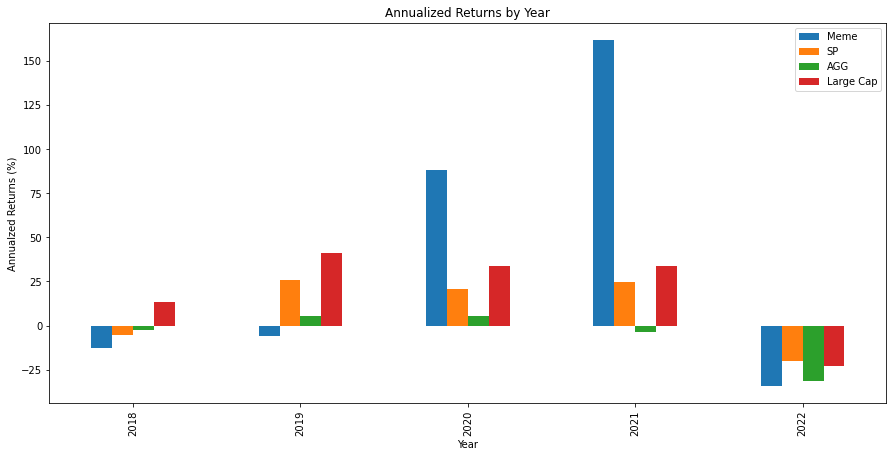

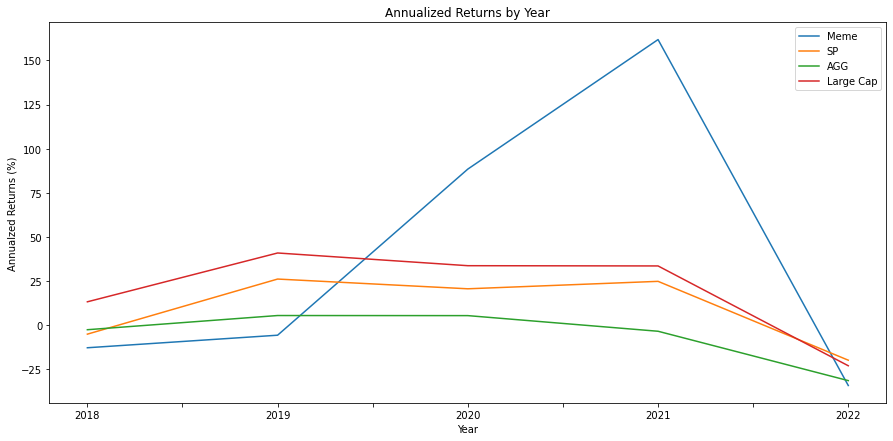

In [51]:
#Plot Annualized Returns by Year - JUNG  #rotate x-axis?###
annualized_returns_by_year_df.plot.bar(x='Year', ylabel='Annualzed Returns (%)', figsize=(15,7), title="Annualized Returns by Year")
annualized_returns_by_year_df.plot(x='Year', ylabel='Annualzed Returns (%)', figsize=(15,7), title="Annualized Returns by Year")

In [52]:
#ANNUAL STANDARD DEVIATIONS - JUNG
annual_standard_deviation_memestock = dailyreturns_df.std() * np.sqrt(trading_days)
annual_standard_deviation_SP = SP_dailyreturn.std() * np.sqrt(trading_days)
annual_standard_deviation_AGG = AGG_dailyreturn.std() * np.sqrt(trading_days)
annual_standard_deviation_large_cap = large_cap_dailyreturns.std() * np.sqrt(trading_days)

print('ANNUAL STANDARD DEVIATIONS (%)')
print(f"Meme:      {round(100*annual_standard_deviation_memestock,2)}%")
print(f"SP:        {round(100*annual_standard_deviation_SP,2)}%")
print(f"Bond:      {round(100*annual_standard_deviation_AGG,2)}%")
print(f"Large cap: {round(100*annual_standard_deviation_large_cap,2)}%")
print('')
print('ANNUAL STANDARD DEVIATIONS')
print('Meme - ',  annual_standard_deviation_memestock)
print('SP - ',  annual_standard_deviation_SP)
print('Bond - ',  annual_standard_deviation_AGG)
print('Large cap - ',  annual_standard_deviation_large_cap)


ANNUAL STANDARD DEVIATIONS (%)
Meme:      59.53%
SP:        19.48%
Bond:      4.89%
Large cap: 27.41%

ANNUAL STANDARD DEVIATIONS
Meme -  0.5953147450268066
SP -  0.19478191932255834
Bond -  0.04892614793853795
Large cap -  0.27408304830215413


In [ ]:
#ANNUAL STANDARD DEVIATIONS GRAPH - JUNG

ax = dailyreturns_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Std.")

SP_dailyreturn.rolling(window=21).std().plot(ax=ax)
AGG_dailyreturn.rolling(window=21).std().plot(ax=ax)
large_cap_dailyreturns.rolling(window=21).std().plot(ax=ax)

ax.legend(['MEME', 'S&P', 'AGG', 'LARGE CAP STOCKS'])

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

In [ ]:
#SHARPE RATIO - JUNG/JENNIFER
meme_sharpe_ratios = annual_average_returns_memestock / annual_standard_deviation_memestock
SP_sharpe_ratios = annual_average_returns_SP / annual_standard_deviation_SP
AGG_sharpe_ratios = annual_average_returns_AGG / annual_standard_deviation_AGG
large_cap_sharpe_ratios = annual_average_returns_large_cap / annual_standard_deviation_large_cap


print('SHARPE RATIOS')
print(f"Meme:      {round(meme_sharpe_ratios,2)}")
print(f"SP:        {round(SP_sharpe_ratios,2)}")
print(f"Bond:      {round(AGG_sharpe_ratios,2)}")
print(f"Large cap: {round(large_cap_sharpe_ratios,2)}")

         

In [ ]:
# Create dataframe for Sharpe Ratios - JUNG
sharpe_ratio_list = {'Portfolio':['Meme', 'SP', 'Bond', 'Large cap'],
        'Sharpe Ratio':[0.66, 0.76, -0.12, 1.02]}
                
sharpe_ratio_list_df = pd.DataFrame(sharpe_ratio_list)

print(sharpe_ratio_list_df)

sharpe_ratio_list_df.plot.bar(x='Portfolio', ylabel='Sharpe Ratio', figsize=(15,7), title="Sharpe Ratio by Portfolio")


In [ ]:
# Configure the Monte Carlo simulation for evenly weighted portfolios
# Forecasting 5 years cumulative returns across 500 samples

mc_meme_even = MCSimulation(
    portfolio_data=meme_portfolio_multi_index_df,
#    weights=[.1,.1,.1],
    num_simulation=500,
    num_trading_days=252*number_of_years_forecast)
mc_meme_even.portfolio_data.head()

In [ ]:
mc_meme_even.calc_cumulative_return()

In [ ]:
mc_meme_even.plot_simulation()

In [ ]:
mc_meme_even.plot_distribution()

In [ ]:
mc_meme_even_summary = mc_meme_even.summarize_cumulative_return()
mc_meme_even_summary

In [ ]:
mc_meme_even_lower_95 = mc_meme_even_summary[8]
mc_meme_even_upper_95 = mc_meme_even_summary[9]
mc_meme_even_mean = mc_meme_even_summary[1]
display(round(mc_meme_even_lower_95,2),
        round(mc_meme_even_mean,2),
        round(mc_meme_even_upper_95,2))

In [ ]:
mc_meme_even_end = pd.DataFrame(mc_meme_even.simulated_return.iloc[-1])
mc_meme_even_end.rename(columns = {1260:'Meme'}, inplace=True)
mc_meme_even_end.plot.box()

In [ ]:
# S&P 500 Monte Carlo simulation for evenly weighted portfolios
# Forecasting 5 years cumulative returns across 500 samples

mc_sp500_even = MCSimulation(
    portfolio_data=market_portfolio_multi_index_df[['SPY']],
#    weights=[.5,.5],
    num_simulation=500,
    num_trading_days=252*number_of_years_forecast)
mc_sp500_even.portfolio_data.head()

In [ ]:
mc_sp500_even.calc_cumulative_return()

In [ ]:
mc_sp500_even_summary = mc_sp500_even.summarize_cumulative_return()
mc_sp500_even_summary

In [ ]:
mc_sp500_even_lower_95 = mc_sp500_even_summary[8]
mc_sp500_even_upper_95 = mc_sp500_even_summary[9]
mc_sp500_even_mean = mc_sp500_even_summary[1]
display(round(mc_sp500_even_lower_95,2),
        round(mc_sp500_even_mean,2),
        round(mc_sp500_even_upper_95,2))

In [ ]:
mc_sp500_even_end = pd.DataFrame(mc_sp500_even.simulated_return.iloc[-1])
mc_sp500_even_end.rename(columns = {1260:'S&P 500'}, inplace=True)
mc_sp500_even_end.plot.box()

In [ ]:
# Bonds Monte Carlo simulation for evenly weighted portfolios
# Forecasting 5 years cumulative returns across 500 samples

mc_agg_even = MCSimulation(
    portfolio_data=market_portfolio_multi_index_df[['AGG']],
#    weights=[.5,.5],
    num_simulation=500,
    num_trading_days=252*number_of_years_forecast)
mc_agg_even.portfolio_data.head()

In [ ]:
mc_agg_even.calc_cumulative_return()

In [ ]:
mc_agg_even_summary = mc_agg_even.summarize_cumulative_return()
mc_agg_even_summary

In [ ]:
mc_agg_even_lower_95 = mc_agg_even_summary[8]
mc_agg_even_upper_95 = mc_agg_even_summary[9]
mc_agg_even_mean = mc_agg_even_summary[1]
display(round(mc_agg_even_lower_95,2),
        round(mc_agg_even_mean,2),
        round(mc_agg_even_upper_95,2))

In [ ]:
mc_agg_even_end = pd.DataFrame(mc_agg_even.simulated_return.iloc[-1])
mc_agg_even_end.rename(columns = {1260:'Bonds'}, inplace=True)
mc_agg_even_end.plot.box()

In [ ]:
# Configure the Monte Carlo simulation for evenly weighted portfolios
# Forecasting 5 years cumulative returns across 500 samples

mc_market_even = MCSimulation(
    portfolio_data=market_portfolio_multi_index_df,
#    weights=[.5,.5],
    num_simulation=500,
    num_trading_days=252*number_of_years_forecast)
mc_meme_even.portfolio_data.head()

In [ ]:
mc_market_even.calc_cumulative_return()

In [ ]:
mc_market_even.plot_simulation()

In [ ]:
mc_market_even.plot_distribution()

In [ ]:
mc_market_even_summary = mc_market_even.summarize_cumulative_return()
mc_market_even_summary

In [ ]:
mc_market_even_lower_95 = mc_market_even_summary[8]
mc_market_even_upper_95 = mc_market_even_summary[9]
mc_market_even_mean = mc_market_even_summary[1]
display(round(mc_market_even_lower_95,2),
        round(mc_market_even_mean,2),
        round(mc_market_even_upper_95,2))

In [ ]:
mc_market_even_end = pd.DataFrame(mc_market_even.simulated_return.iloc[-1])
mc_market_even_end.rename(columns = {1260:'Market'}, inplace=True)
mc_market_even_end.plot.box()

In [ ]:
# Configure the Monte Carlo simulation for evenly weighted portfolios
# Forecasting 5 years cumulative returns across 500 samples

mc_large_cap_even = MCSimulation(
    portfolio_data=large_cap_portfolio_multi_index_df,
#    weights=[.25,.25,.25,.25],
    num_simulation=500,
    num_trading_days=252*number_of_years_forecast)
mc_meme_even.portfolio_data.head()

In [ ]:
mc_large_cap_even.calc_cumulative_return()

In [ ]:
mc_large_cap_even.plot_simulation()

In [ ]:
mc_large_cap_even.plot_distribution()

In [ ]:
mc_large_cap_even_summary = mc_large_cap_even.summarize_cumulative_return()
mc_large_cap_even_summary

In [ ]:
mc_large_cap_even_lower_95 = mc_large_cap_even_summary[8]
mc_large_cap_even_upper_95 = mc_large_cap_even_summary[9]
mc_large_cap_even_mean = mc_large_cap_even_summary[1]
display(round(mc_large_cap_even_lower_95,2),
        round(mc_large_cap_even_mean,2),
        round(mc_large_cap_even_upper_95,2))

In [ ]:
mc_large_cap_even_end = pd.DataFrame(mc_large_cap_even.simulated_return.iloc[-1])
mc_large_cap_even_end.rename(columns = {1260:'Large Cap'}, inplace=True)
mc_large_cap_even_end.plot.box()

In [ ]:
print(f"Meme stock portfolio average return is: {round(100*mc_meme_even_mean,1)}%")
print(f"Large Cap portfolio average return is: {round(100*mc_large_cap_even_mean,1)}%")
print(f"S&P 500 and Bond market average return is: {round(100*mc_market_even_mean,1)}%")

In [ ]:
print("There is a 95% chance the return will be between:")
print(f"Meme stock portfolio lower return is: {round(100*mc_meme_even_lower_95,1)}% - {round(100*mc_meme_even_upper_95,1)}%")
print(f"Large Cap portfolio lower return is: {round(100*mc_large_cap_even_lower_95,1)}% - {round(100*mc_large_cap_even_upper_95,1)}%")
print(f"S&P 500 and Bond market lower return is: {round(100*mc_market_even_lower_95,1)}% - {round(100*mc_market_even_upper_95,1)}%")

In [ ]:
combined_df = mc_meme_even_end.join(mc_sp500_even_end)
combined_df = combined_df.join(mc_agg_even_end)
combined_df = combined_df.join(mc_large_cap_even_end)
combined_df

In [ ]:
combined_df.plot.box(figsize=(15,8), title='5-Year Portfolio Returns Distribution - Monte Carlo Simulations (500)')

### Diversify the Portfolio

Based on our analysis so far, we have the answer to the question, "Are the meme stocks worth investing in?"

In [ ]:
#Box and whiskers 